In [1]:
from landlab.components.overland_flow import OverlandFlow
from landlab.plot.imshow import imshow_grid
from landlab.plot.colors import water_colormap
from landlab import RasterModelGrid
from landlab.io.esri_ascii import read_esri_ascii
from landlab.io.esri_ascii import write_esri_ascii
from matplotlib.pyplot import figure
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
rmg, z = read_esri_ascii(r'Square_TestBasin.asc')
rmg.add_field('topographic__elevation', z, at='node')
rmg.set_closed_boundaries_at_grid_edges(True, True, True, True)

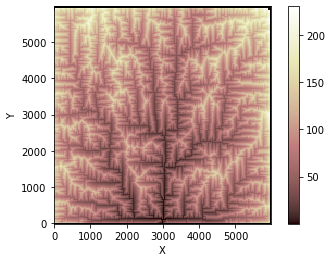

In [7]:
imshow_grid(rmg, 'topographic__elevation')

Reform to extract outlet portion:

In [11]:
#define number of cells you want new grid to be
n_cell_x = 20
n_cell_y = 20
#define spacing of new grid to be same as old grid
dx = rmg.spacing[0]
dy = rmg.spacing[1]

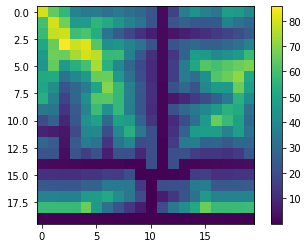

In [16]:
#extract dims of full grid
nrow = rmg.shape[0]
ncol = rmg.shape[1]
#next reform to familiar numpy array
reformed_z = (z.reshape(rmg.shape[0], rmg.shape[1]))
#extract slice from lower center of full grid
z_slice = reformed_z[0:n_cell_y, int(ncol/2-n_cell_x/2):int(ncol/2+n_cell_x/2)]
#check our slice with imshow
f, ax = plt.subplots()
im = ax.imshow(np.flipud(z_slice))
plt.colorbar(im)

Define new grid from z slice and display:

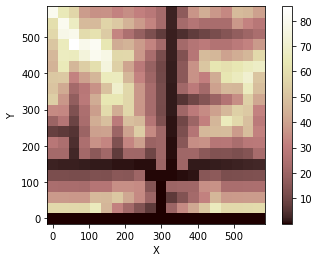

In [17]:
new_rmg = RasterModelGrid((n_cell_x, n_cell_y), xy_spacing=(dx,dy))
new_rmg.add_field('topographic__elevation', np.ravel(z_slice), at='node')
imshow_grid(new_rmg, 'topographic__elevation')

Write topography to ascii file

In [ ]:
files = write_esri_ascii('downsized_network.asc', new_rmg)